Accuracy: 0.8628318584070797
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       581
           1       0.64      0.09      0.16        97

    accuracy                           0.86       678
   macro avg       0.76      0.54      0.54       678
weighted avg       0.84      0.86      0.82       678



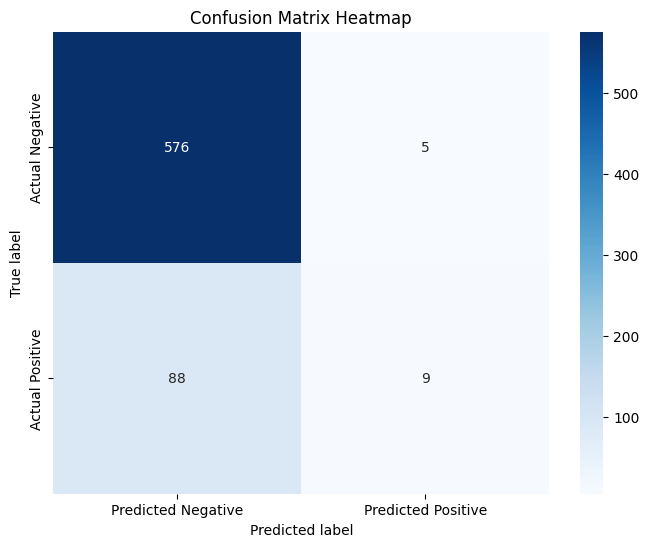

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from a file
data = pd.read_csv('/content/cleaned_framingham.csv')

# Extracting features and target variable
X = data.drop('TenYearCHD', axis=1)
y = data['TenYearCHD']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional but recommended for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating and fitting the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Making predictions on the testing set
y_pred = model.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Printing classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix Heatmap')
plt.show()


In [14]:
import pandas as pd

# Load the dataset
dataset_path = '/content/framingham.csv'
data = pd.read_csv(dataset_path)

# Display the first few rows of the dataset
print("Original dataset:")
print(data.head())

# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())

# Handling missing values
# Drop rows with missing values
data.dropna(inplace=True)

# Remove duplicate rows
data.drop_duplicates(inplace=True)

# Handling outliers (if necessary)
# For example, if you want to remove outliers in the 'age' column
# Define the upper and lower bounds for acceptable values
upper_bound = data['age'].quantile(0.95)
lower_bound = data['age'].quantile(0.05)
# Remove rows where 'age' is outside the acceptable range
data = data[(data['age'] >= lower_bound) & (data['age'] <= upper_bound)]

# Convert data types (if necessary)
# For example, converting 'age' column to integer
data['age'] = data['age'].astype(int)

# Save the cleaned dataset to a new CSV file
cleaned_dataset_path = '/content/cleaned_framingham.csv'
data.to_csv(cleaned_dataset_path, index=False)

# Display the cleaned dataset
print("\nCleaned dataset:")
print(data.head())


Original dataset:
   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
